1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

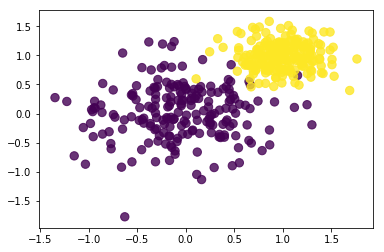

In [2]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

<ipython-input-8-7b6c1bd4052c>:7: RuntimeWarning: covariance is not positive-semidefinite.
  data = np.random.multivariate_normal(mean, cov, 500)


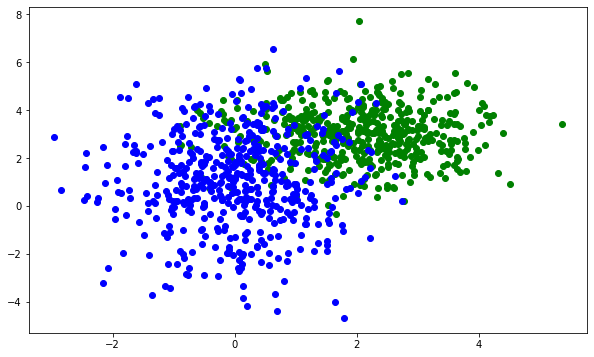

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def dataset_2D(mean, cov) :    
    data = np.random.multivariate_normal(mean, cov, 500)
    df = pd.DataFrame(data, columns = ["x", "y"])

    return df

mean_1, cov_1 = [2, 3], [(1, .5), (.5, -1)]
mean_2, cov_2 = [0, 1], [(1, .3), (.1, 4)]
df_1 = dataset_2D (mean_1, cov_1)
df_2 = dataset_2D (mean_2, cov_2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x="x", y="y", data=df_1, c='g')
ax.scatter(x="x", y="y", data=df_2, c='b')

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

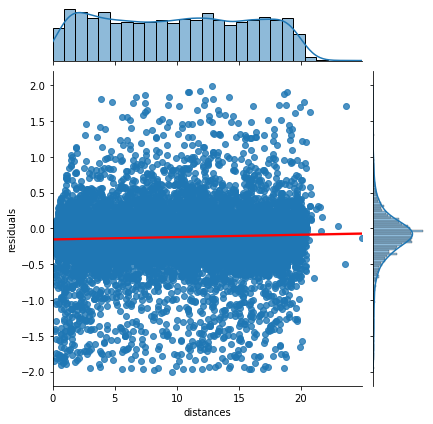

In [33]:
import seaborn as sns

# load the file as an numpy array
data = np.load('data/residuals_261.pkl',allow_pickle=True)
# load it as a pandas dataframe
df = pd.DataFrame(data.item())

#Entries with the absolute values of the variable "residual" smaller than 2
df_cleaned = df[df['residuals'].abs() < 2]
df_cleaned

sns.jointplot(x="distances", y="residuals", data=df_cleaned, kind='reg', line_kws={"color": "red"})


3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


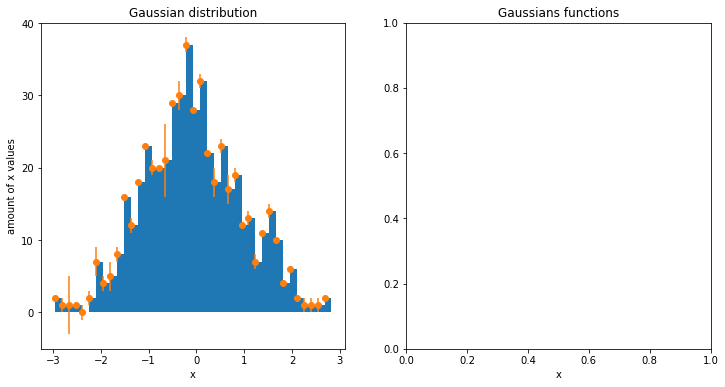

In [6]:
from scipy import stats
#Numpy array
mu = 0
std = 1
N = 500
x = np.random.normal(mu, std, N)

#Create 2 plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
#Title and label for the first plot
ax1.set_title('Gaussian distribution')
ax1.set_xlabel('x')
ax1.set_ylabel('amount of x values')

#Fill an histogram as data points with errors
counts, bin_edges, _ = ax1.hist(x,bins=40)
bin_centrer = 0.5 * (bin_edges[:-1] + bin_edges[:-1])
err = np.random.poisson(size = bin_centrer.size)
ax1.errorbar(bin_centrer, counts, yerr = err, fmt='o')

#Title and label for the second plot
ax2.set_title('Gaussians functions')
ax2.set_xlabel('x')
# gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned
sd = 1.06*np.std(x)*np.size(x)**(-1/5) # std value

val= np.linspace(0,1,N)
gaussx= [stats.norm(xi, sd).pdf(val) for xi in x] # array of gaussian